#### Multi Linear Regression having independent variables continous & categorical.  How will we deal this kind of data? So let us look at an example below where y is a dependent variable and continous in nature. x1 and x2 are independent variables where x1 is continous variable and x2 is categorical variable.

In [23]:
y=[145,69.9,315,144.9,134.9,369,95,228.9,149,295,388.5,75,130,174,334.9]
x1=[1872,1954,4104,1524,1297,3278,1192,2252,1620,2466,3188,1061,1195,1552,2901]
x2=[0,0,1,0,0,1,0,1,0,1,1,0,0,0,1]

We will depict the scatter plot for this data where you can see  that data point classified for 1 and 0 are at higher and lower respectively.

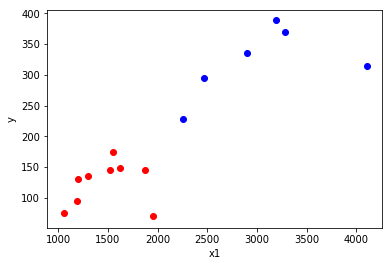

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame({'x1':x1,'x2':x2,'y':y})
df1=df[df['x2']==1]
df0=df[df['x2']==0]
plt.scatter(df1.iloc[:,0],df1.iloc[:,2],color='b')
plt.scatter(df0.iloc[:,0],df0.iloc[:,2],color='r')
plt.xlabel('x1')
plt.ylabel('y')
plt.show()

So we will have the linear equation as
$$y'={b0}+{b1}x_1+{b2}x_2$$
When the $x_2$ is 0 then the equation would be 
$$y'={b0}+{b1}x_1$$
When the $x_2$ is 1 then the equation would be
$$y'=({b0}+{b2})+{b1}x_2$$

In [26]:
import numpy as np
def coeff(x,y):
    b_num = sum([(x[i] - np.mean(x))*(y[i] -np.mean(y)) for i in range(len(x)) ])
    b_den = sum([(x[i]-np.mean(x))**2 for i in range(len(x))])
    b = b_num/b_den
    return b


In [32]:
b1 = coeff(x1,y)
b2 = coeff(x2,y)
b0 = np.mean(y) - b1 * np.mean(x1)# - b2 * np.mean(x2)
print('x1_slope is ',b1)
print('x2 slope is ',b2)
print('intercept is ',b0)

x1_slope is  0.1047798521604641
x2 slope is  197.69444444444446
intercept is  -16.46366863730387


In [28]:
def linearModel(X,y):
    from sklearn.linear_model import LinearRegression  
    regressor = LinearRegression()  
    regressor.fit(X, y)
    y_pred = regressor.predict(X) 
    from sklearn import metrics  
    print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
    print('Co-efficients :',regressor.coef_)
    print('Intercept :',regressor.intercept_)

In [29]:
X = df.iloc[:, :2].values  
y = df.iloc[:, 2].values  
linearModel(X,y)

Mean Absolute Error: 32.02841864924364
Mean Squared Error: 1465.7141866426964
Root Mean Squared Error: 38.28464687890821
Co-efficients : [3.93649336e-02 1.36387934e+02]
Intercept : 66.16060281206396


In [30]:
X

array([[1872,    0],
       [1954,    0],
       [4104,    1],
       [1524,    0],
       [1297,    0],
       [3278,    1],
       [1192,    0],
       [2252,    1],
       [1620,    0],
       [2466,    1],
       [3188,    1],
       [1061,    0],
       [1195,    0],
       [1552,    0],
       [2901,    1]], dtype=int64)

In [31]:
y

array([145. ,  69.9, 315. , 144.9, 134.9, 369. ,  95. , 228.9, 149. ,
       295. , 388.5,  75. , 130. , 174. , 334.9])